# Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import rasterio
from osgeo import gdal
import geopandas as gpd
import shapely
import contextily as ctx
from shapely.geometry import Point
from shapely.geometry import Polygon
from shapely.geometry import box
from scipy.spatial import Voronoi

In [3]:
from climada_petals.hazard.river_flood import RiverFlood
from climada.hazard.centroids import Centroids
from climada.entity import LitPop
from climada_petals.entity.impact_funcs.river_flood import ImpfRiverFlood,flood_imp_func_set
from climada.engine import ImpactCalc
from climada.entity import Exposures
from climada import CONFIG

In [4]:
import osmnx as ox

import os
import osm_flex
import osm_flex.download
import osm_flex.extract
import osm_flex.clip
import osm_flex.simplify

osm_flex.enable_logs()

# Generating a RiverFlood Hazard - ISIMIP NatIDGrid

In [ ]:
years = [2024,2025,2026,2027,2028]

## RCP 2.6

In [ ]:
rf_26 = RiverFlood.from_nc(countries = ['AUT'], years=years, dph_path='cama-flood_clm45_gfdl-esm2m_ewembi_rcp26_2005soc_co2_flddph_none_150arcsec_global_annual_2006_2100.nc4', 
                          frc_path='cama-flood_clm45_gfdl-esm2m_ewembi_rcp26_2005soc_co2_fldfrc_none_150arcsec_global_annual_2006_2100.nc4', ISINatIDGrid=True)
rf_26.event_name

rf_26.centroids.plot()

rf_26.plot_intensity(event=0, smooth = False);
rf_26.plot_fraction(event=0, smooth = False);

rf_26.set_flooded_area(save_centr = True)
print("Affected area in each affected centroid and each event:")
print(rf_26.fla_ev_centr.data)

for i in range(len(years)):
    print("Total flooded area for year " + str(years[i]) + " in Austria:")
    print(str(rf_26.fla_annual[i]) + " m2")

print("Average flooded area per year in Austria:")
print(str(rf_26.fla_ann_av) + " m2")

In [5]:
years = [2014]

## RCP 6.0

C:\Users\aafal\CLIMADA_WD\climada_python\climada\util\coordinates.py:890: RuntimeWarning: invalid value encountered in cast
  region_id = hdf5_f["NatIdGrid"].reshape(grid_shape).astype(int)


2025-08-17 02:28:09,263 - climada.util.coordinates - INFO - Reading cama-flood_clm45_gfdl-esm2m_ewembi_rcp60_2005soc_co2_flddph_none_150arcsec_global_annual_2006_2100.nc4
2025-08-17 02:28:09,725 - climada.util.coordinates - INFO - Reading cama-flood_clm45_gfdl-esm2m_ewembi_rcp60_2005soc_co2_flddph_none_150arcsec_global_annual_2006_2100.nc4
2025-08-17 02:28:10,142 - climada.util.coordinates - INFO - Reading cama-flood_clm45_gfdl-esm2m_ewembi_rcp60_2005soc_co2_fldfrc_none_150arcsec_global_annual_2006_2100.nc4
Affected area in each affected centroid and each event:
[  71135.42865611 1849521.1864651   142270.85731222 ... 2242415.68447717
  385061.25997531 2444255.58060599]
Total flooded area for year 2014 in Austria:
2886320396.7934465 m2
Average flooded area per year in Austria:
2886320396.7934465 m2


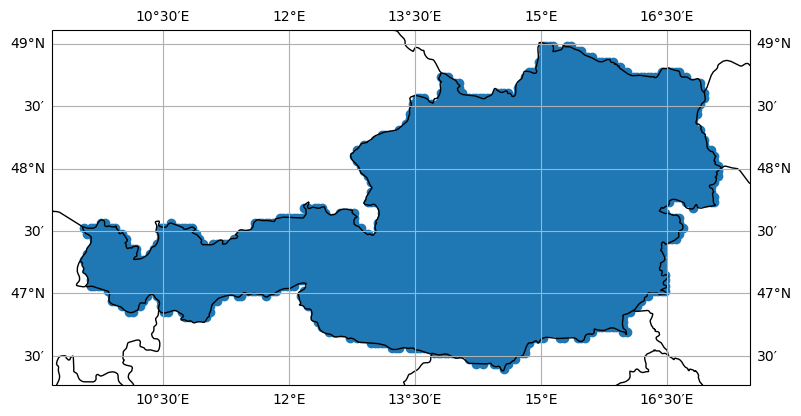

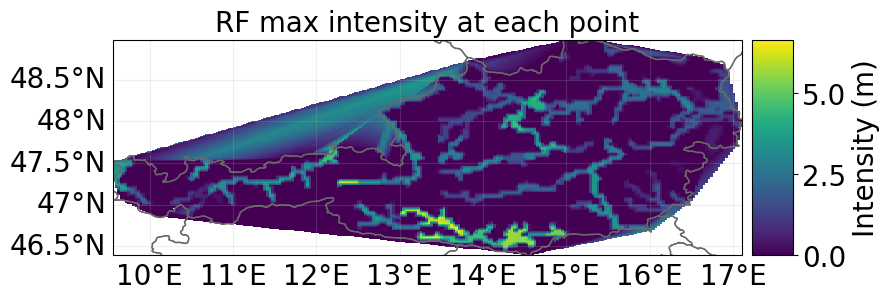

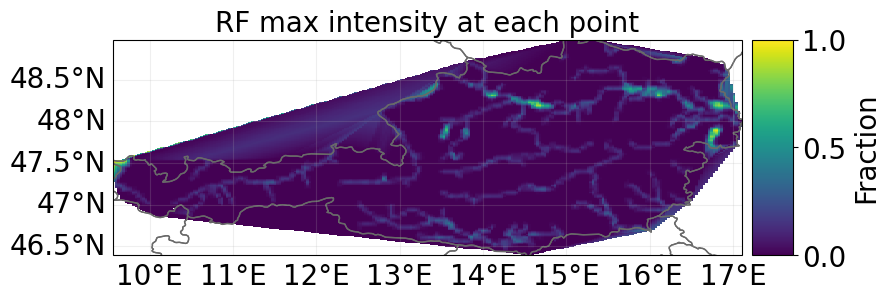

In [6]:
rf_60 = RiverFlood.from_nc(countries = ['AUT'], years=years, dph_path='cama-flood_clm45_gfdl-esm2m_ewembi_rcp60_2005soc_co2_flddph_none_150arcsec_global_annual_2006_2100.nc4', 
                            frc_path='cama-flood_clm45_gfdl-esm2m_ewembi_rcp60_2005soc_co2_fldfrc_none_150arcsec_global_annual_2006_2100.nc4', ISINatIDGrid=True)
rf_60.event_name

rf_60.centroids.plot()

rf_60.plot_intensity(event=0, smooth = False);
rf_60.plot_fraction(event=0, smooth = False);

rf_60.set_flooded_area(save_centr = True)
print("Affected area in each affected centroid and each event:")
print(rf_60.fla_ev_centr.data)

for i in range(len(years)):
    print("Total flooded area for year " + str(years[i]) + " in Austria:")
    print(str(rf_60.fla_annual[i]) + " m2")

print("Average flooded area per year in Austria:")
print(str(rf_60.fla_ann_av) + " m2")

## RCP 8.5

In [ ]:
rf_85 = RiverFlood.from_nc(countries = ['AUT'], years=years, dph_path='cama-flood_clm45_gfdl-esm2m_ewembi_rcp85_2005soc_co2_flddph_none_150arcsec_global_annual_2006_2100.nc4', 
                                frc_path='cama-flood_clm45_gfdl-esm2m_ewembi_rcp85_2005soc_co2_fldfrc_none_150arcsec_global_annual_2006_2100.nc4', ISINatIDGrid=True)
rf_85.event_name

rf_85.centroids.plot()

rf_85.plot_intensity(event=0, smooth = False);
rf_85.plot_fraction(event=0, smooth = False);

rf_85.set_flooded_area(save_centr = True)
print("Affected area in each affected centroid and each event:")
print(rf_85.fla_ev_centr.data)

for i in range(len(years)):
    print("Total flooded area for year " + str(years[i]) + " in Austria:")
    print(str(rf_85.fla_annual[i]) + " m2")

print("Average flooded area per year in Austria:")
print(str(rf_85.fla_ann_av) + " m2")

# Generating Exposure - LitPop

2025-08-17 02:29:13,022 - climada.entity.exposures.litpop.litpop - INFO - 
 LitPop: Init Exposure for country: AUT (40)...

2025-08-17 02:29:14,256 - climada.entity.exposures.base - INFO - Hazard type not set in impf_
2025-08-17 02:29:14,257 - climada.entity.exposures.base - INFO - category_id not set.
2025-08-17 02:29:14,259 - climada.entity.exposures.base - INFO - cover not set.
2025-08-17 02:29:14,259 - climada.entity.exposures.base - INFO - deductible not set.
2025-08-17 02:29:14,259 - climada.entity.exposures.base - INFO - centr_ not set.
GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AXIS["Latitude",NORTH],AXIS["Longitude",EAST],AUTHORITY["EPSG","4326"]]
               value  region_id  impf_                   geometry
0       41242.841048         40      1  POINT (14.97917 49.00417)
1       40395.0

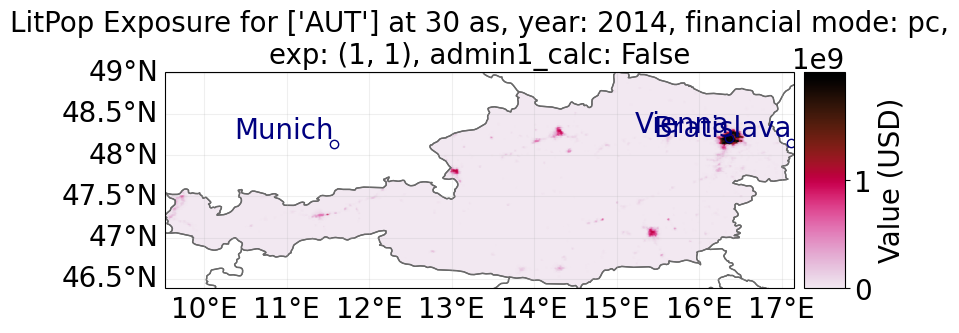

In [7]:
lp_exp = LitPop.from_countries(['AUT'], fin_mode='pc', reference_year=2014)


print(lp_exp.gdf.crs)
print(lp_exp.gdf)
print('Initial Total Exposure:', lp_exp.gdf['value'].sum())

lp_exp.plot_hexbin(pop_name=True);

## Corrections

In [8]:
lp_cor = lp_exp.gdf.copy()
lp_cor['value'] = lp_cor['value']/1.3

print(lp_cor)
print('Corrected Total Exposure:', lp_cor['value'].sum())

               value  region_id  impf_                   geometry
0       31725.262344         40      1  POINT (14.97917 49.00417)
1       31073.152336         40      1   POINT (14.9875 49.00417)
2       17099.085248         40      1  POINT (14.99583 49.00417)
3       26459.059242         40      1  POINT (15.00417 49.00417)
4       31244.172520         40      1   POINT (15.0125 49.00417)
...              ...        ...    ...                        ...
144625  16535.053862         40      1   POINT (14.5625 46.39583)
144626  18891.853794         40      1   POINT (14.52917 46.3875)
144627  18891.856059         40      1    POINT (14.5375 46.3875)
144628  18891.853794         40      1   POINT (14.54583 46.3875)
144629  18096.140512         40      1   POINT (14.55417 46.3875)

[144630 rows x 4 columns]
Corrected Total Exposure: 1401338625645.3074


## Haberl et al

In [ ]:
def prep_haberl_mod2(input_tiff, category_id):
    data = {
        'latitude': [],
        'longitude': [],
        'value': [],
    }

    with rasterio.open(input_tiff) as src:
        nodata = src.nodata
        transform = src.transform
        src_crs = src.crs
        
        for ji, window in src.block_windows(1):
            block = src.read(1, window=window)
            if nodata is not None:
                mask = block != nodata
            else:
                mask = block != 0 

            if not mask.any():
                continue 

            rows, cols = mask.nonzero()
            block_values = block[rows, cols]

            abs_rows = rows + window.row_off
            abs_cols = cols + window.col_off

            xs, ys = rasterio.transform.xy(transform, abs_rows, abs_cols, offset='center')

            data['longitude'].extend(xs)
            data['latitude'].extend(ys)
            data['value'].extend(block_values)

    if not data['value']:
        return gpd.GeoDataFrame(columns=['latitude', 'longitude', 'value', 'region_id', 'category_id', 'geometry', 'impf_RF'], crs="EPSG:3035")

    df = pd.DataFrame(data)
    df['region_id'] = 30
    df['category_id'] = category_id

    df = df[df['value'] != 0]

    gdf = gpd.GeoDataFrame(
        df,
        geometry=gpd.points_from_xy(df['longitude'], df['latitude']),
        crs=src_crs
    )
    gdf = gdf.to_crs("EPSG:4326")
    gdf['impf_RF'] = gdf['region_id'] + gdf['category_id']

    return gdf


In [ ]:
def filter_zero_values(input_tiff, category_id, window_size):

    filtered_data = []

    with rasterio.open(input_tiff) as src:
        nodata = src.nodata
        transform = src.transform
        width, height = src.width, src.height
        
        for i in range(0, height, window_size):
            for j in range(0, width, window_size):
                window = rasterio.windows.Window(j, i, window_size, window_size)
                block = src.read(1, window=window)

                if nodata is not None:
                    mask = block != nodata
                else:
                    mask = block != 0 

                rows, cols = mask.nonzero()
                block_values = block[rows, cols]

                abs_rows = rows + window.row_off
                abs_cols = cols + window.col_off

                xs, ys = rasterio.transform.xy(transform, abs_rows, abs_cols, offset='center')

                for x, y, value in zip(xs, ys, block_values):
                    if value != 0: 
                        filtered_data.append({
                            'longitude': x,
                            'latitude': y,
                            'value': value,
                            'category_id': category_id
                        })
    
    return filtered_data


In [ ]:
def convert_to_geodataframe(filtered_data, src_crs, output_file):

    if not filtered_data:
        print("No data to process.")
        return None

    df = pd.DataFrame(filtered_data)
    
    df['geometry'] = df.apply(lambda row: Point(row['longitude'], row['latitude']), axis=1)
    
    gdf = gpd.GeoDataFrame(df, geometry='geometry', crs=src_crs)
    
    gdf = gdf.to_crs("EPSG:4326")

    gdf['impf_RF'] = gdf['category_id'] + 30
    
    gdf.to_file(output_file, driver="GPKG", mode="w")
    print(f"Finished processing and saved to {output_file}")
    
    return gdf

### VO

In [ ]:
vrt_files = ['C:/Users/aafal/CLIMADA_WD/climada_petals/doc/Projects/AT_VO//mosaic/AT_VO_MASS_BUILDING_HIGHRISE_TOTAL.vrt', 
             'C:/Users/aafal/CLIMADA_WD/climada_petals/doc/Projects/AT_VO//mosaic/AT_VO_MASS_BUILDING_LIGHTWEIGHT_TOTAL.vrt', 
             'C:/Users/aafal/CLIMADA_WD/climada_petals/doc/Projects/AT_VO//mosaic/AT_VO_MASS_BUILDING_MULTIFAMILY_TOTAL.vrt',
             'C:/Users/aafal/CLIMADA_WD/climada_petals/doc/Projects/AT_VO//mosaic/AT_VO_MASS_BUILDING_SINGLEFAMILY_TOTAL.vrt']

datasets = [gdal.Open(vrt) for vrt in vrt_files]

vrt_merged = gdal.BuildVRT("temp_merged.vrt", datasets)

gdal.Translate("vo_residential.tif", vrt_merged)

In [ ]:
vrt_files = ['C:/Users/aafal/CLIMADA_WD/climada_petals/doc/Projects/AT_VO//mosaic/AT_VO_MASS_BUILDING_COMMERCIAL_TOTAL.vrt']

datasets = [gdal.Open(vrt) for vrt in vrt_files]

vrt_merged = gdal.BuildVRT("temp_merged.vrt", datasets)

gdal.Translate("vo_commercial.tif", vrt_merged)

In [ ]:
vrt_files = ['C:/Users/aafal/CLIMADA_WD/climada_petals/doc/Projects/AT_VO//mosaic/AT_VO_MASS_PARKING_TOTAL.vrt',
            'C:/Users/aafal/CLIMADA_WD/climada_petals/doc/Projects/AT_VO//mosaic/AT_VO_MASS_RUNWAY_TOTAL.vrt']

datasets = [gdal.Open(vrt) for vrt in vrt_files]

vrt_merged = gdal.BuildVRT("temp_merged.vrt", datasets)

gdal.Translate("vo_transport.tif", vrt_merged)

In [ ]:
vrt_files = ['C:/Users/aafal/CLIMADA_WD/climada_petals/doc/Projects/AT_VO//mosaic/AT_VO_MASS_RAIL_TOTAL.vrt',
            'C:/Users/aafal/CLIMADA_WD/climada_petals/doc/Projects/AT_VO//mosaic/AT_VO_MASS_STREET_TOTAL.vrt']

datasets = [gdal.Open(vrt) for vrt in vrt_files]

vrt_merged = gdal.BuildVRT("temp_merged.vrt", datasets)

gdal.Translate("vo_infrastructure.tif", vrt_merged)

In [ ]:
vo_res = prep_haberl_mod2('vo_residential.tif', 1)
vo_com = prep_haberl_mod2('vo_commercial.tif', 3)
vo_tra = prep_haberl_mod2('vo_transport.tif', 4)
vo_inf = prep_haberl_mod2('vo_infrastructure.tif', 5)

In [ ]:
total_vo_gdf= pd.concat([vo_res, vo_com, vo_tra, vo_inf], ignore_index=True)
total_vo_gdf

In [ ]:
total_vo_gdf.to_file('total_vo_gdf', driver="GPKG")

### SZ

In [ ]:
vrt_files = ['C:/Users/aafal/CLIMADA_WD/climada_petals/doc/Projects/AT_SZ//mosaic/AT_SZ_MASS_BUILDING_HIGHRISE_TOTAL.vrt', 
             'C:/Users/aafal/CLIMADA_WD/climada_petals/doc/Projects/AT_SZ//mosaic/AT_SZ_MASS_BUILDING_LIGHTWEIGHT_TOTAL.vrt', 
             'C:/Users/aafal/CLIMADA_WD/climada_petals/doc/Projects/AT_SZ//mosaic/AT_SZ_MASS_BUILDING_MULTIFAMILY_TOTAL.vrt',
             'C:/Users/aafal/CLIMADA_WD/climada_petals/doc/Projects/AT_SZ//mosaic/AT_SZ_MASS_BUILDING_SINGLEFAMILY_TOTAL.vrt']

datasets = [gdal.Open(vrt) for vrt in vrt_files]

vrt_merged = gdal.BuildVRT("temp_merged.vrt", datasets)

gdal.Translate("sz_residential.tif", vrt_merged)

In [ ]:
vrt_files = ['C:/Users/aafal/CLIMADA_WD/climada_petals/doc/Projects/AT_SZ//mosaic/AT_SZ_MASS_BUILDING_COMMERCIAL_TOTAL.vrt']

datasets = [gdal.Open(vrt) for vrt in vrt_files]

vrt_merged = gdal.BuildVRT("temp_merged.vrt", datasets)

gdal.Translate("sz_commercial.tif", vrt_merged)

In [ ]:
vrt_files = ['C:/Users/aafal/CLIMADA_WD/climada_petals/doc/Projects/AT_SZ//mosaic/AT_SZ_MASS_PARKING_TOTAL.vrt',
            'C:/Users/aafal/CLIMADA_WD/climada_petals/doc/Projects/AT_SZ//mosaic/AT_SZ_MASS_RUNWAY_TOTAL.vrt']

datasets = [gdal.Open(vrt) for vrt in vrt_files]

vrt_merged = gdal.BuildVRT("temp_merged.vrt", datasets)

gdal.Translate("sz_transport.tif", vrt_merged)

In [ ]:
vrt_files = ['C:/Users/aafal/CLIMADA_WD/climada_petals/doc/Projects/AT_SZ//mosaic/AT_SZ_MASS_RAIL_TOTAL.vrt',
            'C:/Users/aafal/CLIMADA_WD/climada_petals/doc/Projects/AT_SZ//mosaic/AT_SZ_MASS_STREET_TOTAL.vrt']

datasets = [gdal.Open(vrt) for vrt in vrt_files]

vrt_merged = gdal.BuildVRT("temp_merged.vrt", datasets)

gdal.Translate("sz_infrastructure.tif", vrt_merged)

In [ ]:
sz_res = prep_haberl_mod2('sz_residential.tif', 1)
sz_com = prep_haberl_mod2('sz_commercial.tif', 3)
sz_tra = prep_haberl_mod2('sz_transport.tif', 4)
sz_inf = prep_haberl_mod2('sz_infrastructure.tif', 5)

In [ ]:
total_sz_gdf= pd.concat([sz_res, sz_com, sz_tra, sz_inf], ignore_index=True)
total_sz_gdf

In [ ]:
total_sz_gdf.to_file('total_sz_gdf', driver="GPKG")

### BU

In [ ]:
vrt_files = ['C:/Users/aafal/CLIMADA_WD/climada_petals/doc/Projects/AT_BU//mosaic/AT_BU_MASS_BUILDING_HIGHRISE_TOTAL.vrt', 
             'C:/Users/aafal/CLIMADA_WD/climada_petals/doc/Projects/AT_BU//mosaic/AT_BU_MASS_BUILDING_LIGHTWEIGHT_TOTAL.vrt', 
             'C:/Users/aafal/CLIMADA_WD/climada_petals/doc/Projects/AT_BU//mosaic/AT_BU_MASS_BUILDING_MULTIFAMILY_TOTAL.vrt',
             'C:/Users/aafal/CLIMADA_WD/climada_petals/doc/Projects/AT_BU//mosaic/AT_BU_MASS_BUILDING_SINGLEFAMILY_TOTAL.vrt']

datasets = [gdal.Open(vrt) for vrt in vrt_files]

vrt_merged = gdal.BuildVRT("temp_merged.vrt", datasets)

gdal.Translate("bu_residential.tif", vrt_merged)

In [ ]:
vrt_files = ['C:/Users/aafal/CLIMADA_WD/climada_petals/doc/Projects/AT_BU//mosaic/AT_BU_MASS_BUILDING_COMMERCIAL_TOTAL.vrt']

datasets = [gdal.Open(vrt) for vrt in vrt_files]

vrt_merged = gdal.BuildVRT("temp_merged.vrt", datasets)

gdal.Translate("bu_commercial.tif", vrt_merged)

In [ ]:
vrt_files = ['C:/Users/aafal/CLIMADA_WD/climada_petals/doc/Projects/AT_BU//mosaic/AT_BU_MASS_PARKING_TOTAL.vrt',
            'C:/Users/aafal/CLIMADA_WD/climada_petals/doc/Projects/AT_BU//mosaic/AT_BU_MASS_RUNWAY_TOTAL.vrt']

datasets = [gdal.Open(vrt) for vrt in vrt_files]

vrt_merged = gdal.BuildVRT("temp_merged.vrt", datasets)

gdal.Translate("bu_transport.tif", vrt_merged)

In [ ]:
vrt_files = ['C:/Users/aafal/CLIMADA_WD/climada_petals/doc/Projects/AT_BU//mosaic/AT_BU_MASS_RAIL_TOTAL.vrt',
            'C:/Users/aafal/CLIMADA_WD/climada_petals/doc/Projects/AT_BU//mosaic/AT_BU_MASS_STREET_TOTAL.vrt']

datasets = [gdal.Open(vrt) for vrt in vrt_files]

vrt_merged = gdal.BuildVRT("temp_merged.vrt", datasets)

gdal.Translate("bu_infrastructure.tif", vrt_merged)

In [ ]:
bu_res = prep_haberl_mod2('bu_residential.tif', 1)
bu_com = prep_haberl_mod2('bu_commercial.tif', 3)
bu_tra = prep_haberl_mod2('bu_transport.tif', 4)
bu_inf = prep_haberl_mod2('bu_infrastructure.tif', 5)

In [ ]:
total_bu_gdf= pd.concat([bu_res, bu_com, bu_tra, bu_inf], ignore_index=True)
total_bu_gdf

In [ ]:
total_bu_gdf.to_file('total_bu_gdf', driver="GPKG")

### KA

In [ ]:
vrt_files = ['C:/Users/aafal/CLIMADA_WD/climada_petals/doc/Projects/AT_KA//mosaic/AT_KA_MASS_BUILDING_HIGHRISE_TOTAL.vrt', 
             'C:/Users/aafal/CLIMADA_WD/climada_petals/doc/Projects/AT_KA//mosaic/AT_KA_MASS_BUILDING_LIGHTWEIGHT_TOTAL.vrt', 
             'C:/Users/aafal/CLIMADA_WD/climada_petals/doc/Projects/AT_KA//mosaic/AT_KA_MASS_BUILDING_MULTIFAMILY_TOTAL.vrt',
             'C:/Users/aafal/CLIMADA_WD/climada_petals/doc/Projects/AT_KA//mosaic/AT_KA_MASS_BUILDING_SINGLEFAMILY_TOTAL.vrt']

datasets = [gdal.Open(vrt) for vrt in vrt_files]

vrt_merged = gdal.BuildVRT("temp_merged.vrt", datasets)

gdal.Translate("ka_residential.tif", vrt_merged)

In [ ]:
vrt_files = ['C:/Users/aafal/CLIMADA_WD/climada_petals/doc/Projects/AT_KA//mosaic/AT_KA_MASS_BUILDING_COMMERCIAL_TOTAL.vrt']

datasets = [gdal.Open(vrt) for vrt in vrt_files]

vrt_merged = gdal.BuildVRT("temp_merged.vrt", datasets)

gdal.Translate("ka_commercial.tif", vrt_merged)

In [ ]:
vrt_files = ['C:/Users/aafal/CLIMADA_WD/climada_petals/doc/Projects/AT_KA//mosaic/AT_KA_MASS_PARKING_TOTAL.vrt',
            'C:/Users/aafal/CLIMADA_WD/climada_petals/doc/Projects/AT_KA//mosaic/AT_KA_MASS_RUNWAY_TOTAL.vrt']

datasets = [gdal.Open(vrt) for vrt in vrt_files]

vrt_merged = gdal.BuildVRT("temp_merged.vrt", datasets)

gdal.Translate("ka_transport.tif", vrt_merged)

In [ ]:
vrt_files = ['C:/Users/aafal/CLIMADA_WD/climada_petals/doc/Projects/AT_KA//mosaic/AT_KA_MASS_RAIL_TOTAL.vrt',
            'C:/Users/aafal/CLIMADA_WD/climada_petals/doc/Projects/AT_KA//mosaic/AT_KA_MASS_STREET_TOTAL.vrt']

datasets = [gdal.Open(vrt) for vrt in vrt_files]

vrt_merged = gdal.BuildVRT("temp_merged.vrt", datasets)

gdal.Translate("ka_infrastructure.tif", vrt_merged)

In [ ]:
ka_res_flt = filter_zero_values('ka_residential.tif', 1, 1000)

In [ ]:
ka_res_gdf = convert_to_geodataframe(ka_res_flt, "EPSG:3035","ka_residential")
ka_res_gdf

In [ ]:
ka_com_flt = filter_zero_values('ka_commercial.tif', 3, 1000)

In [ ]:
ka_com_gdf = convert_to_geodataframe(ka_com_flt, "EPSG:3035","ka_commercial")
ka_com_gdf

In [ ]:
ka_tra_flt = filter_zero_values('ka_transport.tif', 4, 1000)

In [ ]:
ka_tra_gdf = convert_to_geodataframe(ka_tra_flt, "EPSG:3035","ka_transport")
ka_tra_gdf

In [ ]:
ka_inf_flt = filter_zero_values('ka_infrastructure.tif', 5, 1000)

In [ ]:
ka_inf_gdf = convert_to_geodataframe(ka_inf_flt, "EPSG:3035","ka_infrastructure")
ka_inf_gdf

In [ ]:
total_ka_gdf= pd.concat([ka_res_gdf, ka_com_gdf, ka_tra_gdf, ka_inf_gdf], ignore_index=True)
total_ka_gdf

In [ ]:
total_ka_gdf.to_file('total_ka_gdf', driver="GPKG")

### TR

In [ ]:
vrt_files = ['C:/Users/aafal/CLIMADA_WD/climada_petals/doc/Projects/AT_TR//mosaic/AT_TR_MASS_BUILDING_HIGHRISE_TOTAL.vrt', 
             'C:/Users/aafal/CLIMADA_WD/climada_petals/doc/Projects/AT_TR//mosaic/AT_TR_MASS_BUILDING_LIGHTWEIGHT_TOTAL.vrt', 
             'C:/Users/aafal/CLIMADA_WD/climada_petals/doc/Projects/AT_TR//mosaic/AT_TR_MASS_BUILDING_MULTIFAMILY_TOTAL.vrt',
             'C:/Users/aafal/CLIMADA_WD/climada_petals/doc/Projects/AT_TR//mosaic/AT_TR_MASS_BUILDING_SINGLEFAMILY_TOTAL.vrt']

datasets = [gdal.Open(vrt) for vrt in vrt_files]

vrt_merged = gdal.BuildVRT("temp_merged.vrt", datasets)

gdal.Translate("tr_residential.tif", vrt_merged)

In [ ]:
vrt_files = ['C:/Users/aafal/CLIMADA_WD/climada_petals/doc/Projects/AT_TR//mosaic/AT_TR_MASS_BUILDING_COMMERCIAL_TOTAL.vrt']

datasets = [gdal.Open(vrt) for vrt in vrt_files]

vrt_merged = gdal.BuildVRT("temp_merged.vrt", datasets)

gdal.Translate("tr_commercial.tif", vrt_merged)

In [ ]:
vrt_files = ['C:/Users/aafal/CLIMADA_WD/climada_petals/doc/Projects/AT_TR//mosaic/AT_TR_MASS_PARKING_TOTAL.vrt',
            'C:/Users/aafal/CLIMADA_WD/climada_petals/doc/Projects/AT_TR//mosaic/AT_TR_MASS_RUNWAY_TOTAL.vrt']

datasets = [gdal.Open(vrt) for vrt in vrt_files]

vrt_merged = gdal.BuildVRT("temp_merged.vrt", datasets)

gdal.Translate("tr_transport.tif", vrt_merged)

In [ ]:
vrt_files = ['C:/Users/aafal/CLIMADA_WD/climada_petals/doc/Projects/AT_TR//mosaic/AT_TR_MASS_RAIL_TOTAL.vrt',
            'C:/Users/aafal/CLIMADA_WD/climada_petals/doc/Projects/AT_TR//mosaic/AT_TR_MASS_STREET_TOTAL.vrt']

datasets = [gdal.Open(vrt) for vrt in vrt_files]

vrt_merged = gdal.BuildVRT("temp_merged.vrt", datasets)

gdal.Translate("tr_infrastructure.tif", vrt_merged)

In [ ]:
tr_res_flt = filter_zero_values('tr_residential.tif', 1, 1000)

In [ ]:
tr_res_gdf = convert_to_geodataframe(tr_res_flt, "EPSG:3035","tr_residential")
tr_res_gdf

In [ ]:
tr_com_flt = filter_zero_values('tr_commercial.tif', 3, 1000)

In [ ]:
tr_com_gdf = convert_to_geodataframe(tr_com_flt, "EPSG:3035","tr_commercial")
tr_com_gdf

In [ ]:
tr_tra_flt = filter_zero_values('tr_transport.tif', 4, 1000)

In [ ]:
tr_tra_gdf = convert_to_geodataframe(tr_tra_flt, "EPSG:3035","tr_transport")
tr_tra_gdf

In [ ]:
tr_inf_flt = filter_zero_values('tr_infrastructure.tif', 5, 1000)

In [ ]:
tr_inf_gdf = convert_to_geodataframe(tr_inf_flt, "EPSG:3035","tr_infrastructure")
tr_inf_gdf

In [ ]:
total_tr_gdf= pd.concat([tr_res_gdf, tr_com_gdf, tr_tra_gdf, tr_inf_gdf], ignore_index=True)
total_tr_gdf

In [ ]:
total_tr_gdf.to_file('total_tr_gdf', driver="GPKG")

### OO

In [ ]:
vrt_files = ['C:/Users/aafal/CLIMADA_WD/climada_petals/doc/Projects/AT_OO//mosaic/AT_OO_MASS_BUILDING_HIGHRISE_TOTAL.vrt', 
             'C:/Users/aafal/CLIMADA_WD/climada_petals/doc/Projects/AT_OO//mosaic/AT_OO_MASS_BUILDING_LIGHTWEIGHT_TOTAL.vrt', 
             'C:/Users/aafal/CLIMADA_WD/climada_petals/doc/Projects/AT_OO//mosaic/AT_OO_MASS_BUILDING_MULTIFAMILY_TOTAL.vrt',
             'C:/Users/aafal/CLIMADA_WD/climada_petals/doc/Projects/AT_OO//mosaic/AT_OO_MASS_BUILDING_SINGLEFAMILY_TOTAL.vrt']

datasets = [gdal.Open(vrt) for vrt in vrt_files]

vrt_merged = gdal.BuildVRT("temp_merged.vrt", datasets)

gdal.Translate("oo_residential.tif", vrt_merged)

In [ ]:
vrt_files = ['C:/Users/aafal/CLIMADA_WD/climada_petals/doc/Projects/AT_OO//mosaic/AT_OO_MASS_BUILDING_COMMERCIAL_TOTAL.vrt']

datasets = [gdal.Open(vrt) for vrt in vrt_files]

vrt_merged = gdal.BuildVRT("temp_merged.vrt", datasets)

gdal.Translate("oo_commercial.tif", vrt_merged)

In [ ]:
vrt_files = ['C:/Users/aafal/CLIMADA_WD/climada_petals/doc/Projects/AT_OO//mosaic/AT_OO_MASS_PARKING_TOTAL.vrt',
            'C:/Users/aafal/CLIMADA_WD/climada_petals/doc/Projects/AT_OO//mosaic/AT_OO_MASS_RUNWAY_TOTAL.vrt']

datasets = [gdal.Open(vrt) for vrt in vrt_files]

vrt_merged = gdal.BuildVRT("temp_merged.vrt", datasets)

gdal.Translate("oo_transport.tif", vrt_merged)

In [ ]:
vrt_files = ['C:/Users/aafal/CLIMADA_WD/climada_petals/doc/Projects/AT_OO//mosaic/AT_OO_MASS_RAIL_TOTAL.vrt',
            'C:/Users/aafal/CLIMADA_WD/climada_petals/doc/Projects/AT_OO//mosaic/AT_OO_MASS_STREET_TOTAL.vrt']

datasets = [gdal.Open(vrt) for vrt in vrt_files]

vrt_merged = gdal.BuildVRT("temp_merged.vrt", datasets)

gdal.Translate("oo_infrastructure.tif", vrt_merged)

In [ ]:
oo_res_flt = filter_zero_values('oo_residential.tif', 1, 1000)

In [ ]:
oo_res_gdf = convert_to_geodataframe(oo_res_flt, "EPSG:3035","oo_residential")
oo_res_gdf

In [ ]:
oo_com_flt = filter_zero_values('oo_commercial.tif', 3, 1000)

In [ ]:
oo_com_gdf = convert_to_geodataframe(oo_com_flt, "EPSG:3035","oo_commercial")
oo_com_gdf

In [ ]:
oo_tra_flt = filter_zero_values('oo_transport.tif', 4, 1000)

In [ ]:
oo_tra_gdf = convert_to_geodataframe(oo_tra_flt, "EPSG:3035","oo_transport")
oo_tra_gdf

In [ ]:
oo_inf_flt = filter_zero_values('oo_infrastructure.tif', 5, 1000)

In [ ]:
oo_inf_gdf = convert_to_geodataframe(oo_inf_flt, "EPSG:3035","oo_infrastructure")
oo_inf_gdf

In [ ]:
total_oo_gdf= pd.concat([oo_res_gdf, oo_com_gdf, oo_tra_gdf, oo_inf_gdf], ignore_index=True)
total_oo_gdf

In [ ]:
total_oo_gdf.to_file('total_oo_gdf', driver="GPKG")

### ST

In [ ]:
vrt_files = ['C:/Users/aafal/CLIMADA_WD/climada_petals/doc/Projects/AT_ST//mosaic/AT_ST_MASS_BUILDING_HIGHRISE_TOTAL.vrt', 
             'C:/Users/aafal/CLIMADA_WD/climada_petals/doc/Projects/AT_ST//mosaic/AT_ST_MASS_BUILDING_LIGHTWEIGHT_TOTAL.vrt', 
             'C:/Users/aafal/CLIMADA_WD/climada_petals/doc/Projects/AT_ST//mosaic/AT_ST_MASS_BUILDING_MULTIFAMILY_TOTAL.vrt',
             'C:/Users/aafal/CLIMADA_WD/climada_petals/doc/Projects/AT_ST//mosaic/AT_ST_MASS_BUILDING_SINGLEFAMILY_TOTAL.vrt']

datasets = [gdal.Open(vrt) for vrt in vrt_files]

vrt_merged = gdal.BuildVRT("temp_merged.vrt", datasets)

gdal.Translate("st_residential.tif", vrt_merged)

In [ ]:
vrt_files = ['C:/Users/aafal/CLIMADA_WD/climada_petals/doc/Projects/AT_ST//mosaic/AT_ST_MASS_BUILDING_COMMERCIAL_TOTAL.vrt']

datasets = [gdal.Open(vrt) for vrt in vrt_files]

vrt_merged = gdal.BuildVRT("temp_merged.vrt", datasets)

gdal.Translate("st_commercial.tif", vrt_merged)

In [ ]:
vrt_files = ['C:/Users/aafal/CLIMADA_WD/climada_petals/doc/Projects/AT_ST//mosaic/AT_ST_MASS_PARKING_TOTAL.vrt',
            'C:/Users/aafal/CLIMADA_WD/climada_petals/doc/Projects/AT_ST//mosaic/AT_ST_MASS_RUNWAY_TOTAL.vrt']

datasets = [gdal.Open(vrt) for vrt in vrt_files]

vrt_merged = gdal.BuildVRT("temp_merged.vrt", datasets)

gdal.Translate("st_transport.tif", vrt_merged)

In [ ]:
vrt_files = ['C:/Users/aafal/CLIMADA_WD/climada_petals/doc/Projects/AT_ST//mosaic/AT_ST_MASS_RAIL_TOTAL.vrt',
            'C:/Users/aafal/CLIMADA_WD/climada_petals/doc/Projects/AT_ST//mosaic/AT_ST_MASS_STREET_TOTAL.vrt']

datasets = [gdal.Open(vrt) for vrt in vrt_files]

vrt_merged = gdal.BuildVRT("temp_merged.vrt", datasets)

gdal.Translate("st_infrastructure.tif", vrt_merged)

In [ ]:
st_res_flt = filter_zero_values('st_residential.tif', 1, 1000)

In [ ]:
st_res_gdf = convert_to_geodataframe(st_res_flt, "EPSG:3035","st_residential")
st_res_gdf

In [ ]:
st_com_flt = filter_zero_values('st_commercial.tif', 3, 1000)

In [ ]:
st_com_gdf = convert_to_geodataframe(st_com_flt, "EPSG:3035","st_commercial")
st_com_gdf

In [ ]:
st_tra_flt = filter_zero_values('st_transport.tif', 4, 1000)

In [ ]:
st_tra_gdf = convert_to_geodataframe(st_tra_flt, "EPSG:3035","st_transport")
st_tra_gdf

In [ ]:
st_inf_flt = filter_zero_values('st_infrastructure.tif', 5, 1000)

In [ ]:
st_inf_gdf = convert_to_geodataframe(st_inf_flt, "EPSG:3035","st_infrastructure")
st_inf_gdf

In [ ]:
total_st_gdf= pd.concat([st_res_gdf, st_com_gdf, st_tra_gdf, st_inf_gdf], ignore_index=True)
total_st_gdf

In [ ]:
total_st_gdf.to_file('total_st_gdf', driver="GPKG")

### Wien

In [ ]:
vrt_files = ['C:/Users/aafal/CLIMADA_WD/climada_petals/doc/Projects/AT_WI//mosaic/AT_WI_MASS_BUILDING_HIGHRISE_TOTAL.vrt', 
             'C:/Users/aafal/CLIMADA_WD/climada_petals/doc/Projects/AT_WI//mosaic/AT_WI_MASS_BUILDING_LIGHTWEIGHT_TOTAL.vrt', 
             'C:/Users/aafal/CLIMADA_WD/climada_petals/doc/Projects/AT_WI//mosaic/AT_WI_MASS_BUILDING_MULTIFAMILY_TOTAL.vrt',
             'C:/Users/aafal/CLIMADA_WD/climada_petals/doc/Projects/AT_WI//mosaic/AT_WI_MASS_BUILDING_SINGLEFAMILY_TOTAL.vrt']

datasets = [gdal.Open(vrt) for vrt in vrt_files]

vrt_merged = gdal.BuildVRT("temp_merged.vrt", datasets)

gdal.Translate("wi_residential.tif", vrt_merged)

In [ ]:
vrt_files = ['C:/Users/aafal/CLIMADA_WD/climada_petals/doc/Projects/AT_WI//mosaic/AT_WI_MASS_BUILDING_COMMERCIAL_TOTAL.vrt']

datasets = [gdal.Open(vrt) for vrt in vrt_files]

vrt_merged = gdal.BuildVRT("temp_merged.vrt", datasets)

gdal.Translate("wi_commercial.tif", vrt_merged)

In [ ]:
vrt_files = ['C:/Users/aafal/CLIMADA_WD/climada_petals/doc/Projects/AT_WI//mosaic/AT_WI_MASS_PARKING_TOTAL.vrt',
            'C:/Users/aafal/CLIMADA_WD/climada_petals/doc/Projects/AT_WI//mosaic/AT_WI_MASS_RUNWAY_TOTAL.vrt']

datasets = [gdal.Open(vrt) for vrt in vrt_files]

vrt_merged = gdal.BuildVRT("temp_merged.vrt", datasets)

gdal.Translate("wi_transport.tif", vrt_merged)

In [ ]:
vrt_files = ['C:/Users/aafal/CLIMADA_WD/climada_petals/doc/Projects/AT_WI//mosaic/AT_WI_MASS_RAIL_TOTAL.vrt',
            'C:/Users/aafal/CLIMADA_WD/climada_petals/doc/Projects/AT_WI//mosaic/AT_WI_MASS_STREET_TOTAL.vrt']

datasets = [gdal.Open(vrt) for vrt in vrt_files]

vrt_merged = gdal.BuildVRT("temp_merged.vrt", datasets)

gdal.Translate("wi_infrastructure.tif", vrt_merged)

In [ ]:
wi_res = prep_haberl_mod2('wi_residential.tif', 1)
wi_com = prep_haberl_mod2('wi_commercial.tif', 3)
wi_tra = prep_haberl_mod2('wi_transport.tif', 4)
wi_inf = prep_haberl_mod2('wi_infrastructure.tif', 5)

In [ ]:
total_wi_gdf= pd.concat([wi_res, wi_com, wi_tra, wi_inf], ignore_index=True)
total_wi_gdf

In [ ]:
total_wi_gdf.to_file('total_wi_gdf', driver="GPKG")

### Niederosterreich

In [ ]:
vrt_files = ['C:/Users/aafal/CLIMADA_WD/climada_petals/doc/Projects/AT_NO//mosaic/AT_NO_MASS_BUILDING_HIGHRISE_TOTAL.vrt', 
             'C:/Users/aafal/CLIMADA_WD/climada_petals/doc/Projects/AT_NO//mosaic/AT_NO_MASS_BUILDING_LIGHTWEIGHT_TOTAL.vrt', 
             'C:/Users/aafal/CLIMADA_WD/climada_petals/doc/Projects/AT_NO//mosaic/AT_NO_MASS_BUILDING_MULTIFAMILY_TOTAL.vrt',
             'C:/Users/aafal/CLIMADA_WD/climada_petals/doc/Projects/AT_NO//mosaic/AT_NO_MASS_BUILDING_SINGLEFAMILY_TOTAL.vrt']

datasets = [gdal.Open(vrt) for vrt in vrt_files]

vrt_merged = gdal.BuildVRT("temp_merged.vrt", datasets)

gdal.Translate("no_residential.tif", vrt_merged)

In [ ]:
vrt_files = ['C:/Users/aafal/CLIMADA_WD/climada_petals/doc/Projects/AT_NO//mosaic/AT_NO_MASS_BUILDING_COMMERCIAL_TOTAL.vrt']

datasets = [gdal.Open(vrt) for vrt in vrt_files]

vrt_merged = gdal.BuildVRT("temp_merged.vrt", datasets)

gdal.Translate("no_commercial.tif", vrt_merged)

In [ ]:
vrt_files = ['C:/Users/aafal/CLIMADA_WD/climada_petals/doc/Projects/AT_NO//mosaic/AT_NO_MASS_PARKING_TOTAL.vrt',
            'C:/Users/aafal/CLIMADA_WD/climada_petals/doc/Projects/AT_NO//mosaic/AT_NO_MASS_RUNWAY_TOTAL.vrt']

datasets = [gdal.Open(vrt) for vrt in vrt_files]

vrt_merged = gdal.BuildVRT("temp_merged.vrt", datasets)

gdal.Translate("no_transport.tif", vrt_merged)

In [ ]:
vrt_files = ['C:/Users/aafal/CLIMADA_WD/climada_petals/doc/Projects/AT_NO//mosaic/AT_NO_MASS_RAIL_TOTAL.vrt',
            'C:/Users/aafal/CLIMADA_WD/climada_petals/doc/Projects/AT_NO//mosaic/AT_NO_MASS_STREET_TOTAL.vrt']

datasets = [gdal.Open(vrt) for vrt in vrt_files]

vrt_merged = gdal.BuildVRT("temp_merged.vrt", datasets)

gdal.Translate("no_infrastructure.tif", vrt_merged)

In [ ]:
no_res_flt = filter_zero_values('no_residential.tif', 1, 1000)

In [ ]:
no_res_gdf = convert_to_geodataframe(no_res_flt, "EPSG:3035","no_residential")
no_res_gdf

In [ ]:
no_com_flt = filter_zero_values('no_commercial.tif', 3, 1000)

In [ ]:
no_com_gdf = convert_to_geodataframe(no_com_flt, "EPSG:3035","no_commercial")
no_com_gdf

In [ ]:
no_tra_flt = filter_zero_values('no_transport.tif', 4, 1000)

In [ ]:
no_tra_gdf = convert_to_geodataframe(no_tra_flt, "EPSG:3035","no_transport")
no_tra_gdf

In [ ]:
no_inf_flt = filter_zero_values('no_infrastructure.tif', 5, 1000)

In [ ]:
no_inf_gdf = convert_to_geodataframe(no_inf_flt, "EPSG:3035","no_infrastructure")
no_inf_gdf

In [ ]:
total_no_gdf= pd.concat([no_res_gdf, no_com_gdf, no_tra_gdf, no_inf_gdf], ignore_index=True)
total_no_gdf

In [ ]:
mid = (total_no_gdf['longitude'].min() + total_no_gdf['longitude'].max())/2

gdf_east = total_no_gdf[total_no_gdf['longitude'] >= mid].copy()
gdf_west = total_no_gdf[total_no_gdf['longitude'] < mid].copy()

In [ ]:
gdf_west.to_file('total_no1_gdf', driver='GPKG')
gdf_east.to_file('total_no2_gdf', driver='GPKG')

# Imports

## Values as Polygons

In [ ]:
gdf_values = lp_cor.to_crs(epsg=32633)
gdf_values = gdf_values.reset_index(drop=True)

points = np.array([[geom.x, geom.y] for geom in gdf_values.geometry])
vor = Voronoi(points)

bounding_poly = gdf_values.unary_union.convex_hull.buffer(10000)

def construct_voronoi_polygons(vor, bounding_shape):
    regions = []
    for region_index in vor.point_region:
        region = vor.regions[region_index]
        if not region or -1 in region:
            continue
        try:
            polygon = Polygon([vor.vertices[i] for i in region])
            if polygon.is_valid and polygon.area > 0:
                clipped = polygon.intersection(bounding_shape)
                if not clipped.is_empty:
                    regions.append(clipped)
        except:
            continue
    return regions

vor_polygons = construct_voronoi_polygons(vor, bounding_poly)
gdf_voronoi = gpd.GeoDataFrame(geometry=vor_polygons, crs=gdf_values.crs)
gdf_voronoi['gdf_values_id'] = range(len(gdf_voronoi))

gdf_values['gdf_values_id'] = gdf_voronoi['gdf_values_id']
gdf_voronoi = gdf_voronoi.merge(gdf_values[['gdf_values_id', 'value']], on='gdf_values_id')

In [ ]:
# Step 1: Create bounding box for Vienna (or use exact boundary from OpenStreetMap)
vienna_bbox = box(16.2, 48.1, 16.6, 48.3)  # Example bounding box around Vienna
vienna_gdf = gpd.GeoDataFrame({'name': ['Vienna']}, geometry=[vienna_bbox], crs="EPSG:4326")

# Step 2: Reproject both dataframes to the same CRS (for accurate clipping)
gdf_voronoi = gdf_voronoi.to_crs(epsg=3035)  # Reproject Voronoi polygons to the same CRS (if necessary)
vienna_gdf = vienna_gdf.to_crs(epsg=3035)  # Reproject Vienna boundary

# Step 3: Clip Voronoi polygons to Vienna boundary
gdf_voronoi_clipped = gpd.overlay(gdf_voronoi, vienna_gdf, how='intersection')

# Step 4: Plotting
fig, ax = plt.subplots(figsize=(10, 10))

# Plot the clipped Voronoi polygons with a color map
voronoi_plot = gdf_voronoi_clipped.plot(column='value', cmap='viridis', edgecolor='black', ax=ax)

# Plot the Vienna boundary (optional)
vienna_gdf.boundary.plot(ax=ax, edgecolor='red', linewidth=2)

# Add colorbar (legend) for the 'value' column
# The colorbar corresponds to the 'value' column in the plot
sm = plt.cm.ScalarMappable(cmap='viridis', norm=plt.Normalize(vmin=gdf_voronoi_clipped['value'].min(), vmax=gdf_voronoi_clipped['value'].max()))
sm.set_array([])  # Empty array is needed for the colorbar to work
cbar = fig.colorbar(sm, ax=ax)
cbar.set_label('Value')  # Label for the colorbar

# Title and labels
plt.title("Voronoi Polygons Clipped to Vienna")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid(True)

# Show the plot
plt.show()

In [ ]:
gdf_voronoi = gdf_voronoi.to_crs(epsg=32633)

## Infrastructure as Points

## Aggregation

### Imports

In [ ]:
total_gdf = gpd.read_file("total_wi_gdf")

In [ ]:
total_gdf = gpd.read_file("total_vo_gdf")

In [ ]:
total_gdf = gpd.read_file("total_bu_gdf")

In [ ]:
total_gdf = gpd.read_file("total_sz_gdf")

In [ ]:
total_gdf = gpd.read_file("total_tr_gdf")

In [ ]:
total_gdf = gpd.read_file("total_ka_gdf")

In [ ]:
total_gdf = gpd.read_file("total_oo_gdf")

In [ ]:
total_gdf = gpd.read_file("total_st_gdf")

#### NO

In [ ]:
# Special for NO (due to dataset size)
# Part1 (West):
total_gdf = gpd.read_file("total_no1_gdf")

In [ ]:
# Part 2 (East):
total_gdf = gpd.read_file("total_no2_gdf")

## Interpolation

In [ ]:
total_gdf['EPSG_4326']=total_gdf['geometry']

In [ ]:
gdf_points = total_gdf.drop(columns=['value'])
gdf_points = gdf_points.to_crs(epsg=32633)

In [ ]:
join = gpd.sjoin(gdf_points, gdf_voronoi, how='left', predicate='intersects')
joined = join.copy()

In [ ]:
weights_map = {
    1: 0.50,
    3: 0.20,
    4: 0.10,
    5: 0.20
}

joined['weight'] = joined['category_id'].map(weights_map).fillna(0)

weight_sums = joined.groupby('gdf_values_id')['weight'].sum().rename('total_weight')

joined = joined.merge(weight_sums, on='gdf_values_id', how='left')

joined['assigned_value'] = joined.apply(
    lambda row: row['value'] * row['weight'] / row['total_weight']
    if row['total_weight'] > 0 else 0,
    axis=1
)

total_exp = joined.drop(columns=['index_right','latitude','longitude','geometry','value', 'weight', 'total_weight']).copy()
total_exp.rename(columns={'assigned_value': 'value'}, inplace=True)
total_exp.rename(columns={'EPSG_4326': 'geometry'}, inplace=True)
total_exp

In [ ]:
total_exp.to_file('total_exp_no2', driver = 'GPKG')

In [ ]:
total_exp_log = total_exp.copy()
total_exp_log['value'] = total_exp_log['value'].apply(lambda x: 1 if x <= 0 else x)
total_exp_log['value'] = np.log10(total_exp_log['value'])
total_exp_log

In [ ]:
total_exp_log.to_file('total_exp_log_no2', driver = 'GPKG')

In [ ]:
test = gpd.read_file("total_exp_wi.gpkg")
test

## Setting up Exposure

### Extension - Critical Facilities

In [ ]:
total_exp = gpd.read_file("total_exp_st.gpkg")

In [ ]:
ext_total_exp = total_exp.copy()

In [ ]:
gdf_power_aut= gpd.read_file("gdf_power_aut")

Not needed anymore:

In [ ]:
iso3 = 'AUT'
path_aut_dump = osm_flex.download.get_country_geofabrik(iso3)
osm_flex.config.DICT_CIS_OSM.keys()

In [ ]:
gdf_power_aut = osm_flex.extract.extract_cis(
    path_aut_dump,
    'power')

In [ ]:
gdf_power_aut.to_file('gdf_power_aut', driver='GPKG')

In [ ]:
ax = gdf_power_aut.plot(figsize=(15, 15), alpha=1, markersize=5, color='blue', edgecolor='blue')
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles, loc='upper left')
ax.set_title('Power Facilities Austria', fontsize=25)
plt.show()

In [ ]:
vis_power = gdf_power_aut.to_crs(epsg=3857)

# Plot small dots
fig, ax = plt.subplots(figsize=(15, 115))
vis_power.plot(ax=ax, markersize=1, color='blue', alpha=0.7)

# Add basemap (e.g., OpenStreetMap)
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)

In [ ]:
col_to_update = 'impf_RF'

update = gpd.sjoin(ext_total_exp, gdf_power_aut, predicate='intersects', how='inner')

matching_indices = update.index

ext_total_exp.loc[matching_indices, col_to_update] = 36

In [ ]:
power_wi = ext_total_exp[ext_total_exp['impf_RF']==36].to_crs(epsg=3857)

# Plot small dots
fig, ax = plt.subplots(figsize=(10, 10))
power_wi.plot(ax=ax, markersize=1, color='blue', alpha=0.7)

# Add basemap (e.g., OpenStreetMap)
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)

In [ ]:
ext_total_exp.to_file('ext_total_exp_st', driver = 'GPKG')

### Real Values

In [ ]:
ext_total_exp = gpd.read_file("ext_total_exp_wi.gpkg")

In [ ]:
exp = Exposures(ext_total_exp)
exp.check()
exp.plot_hexbin(pop_name=True);

### Log Scale

In [ ]:
ext_total_exp_log = ext_total_exp.copy()
ext_total_exp_log['value'] = ext_total_exp_log['value'].apply(lambda x: 1 if x <= 0 else x)
ext_total_exp_log['value'] = np.log10(ext_total_exp_log['value'])
ext_total_exp_log

In [ ]:
exp_log = Exposures(ext_total_exp_log)
exp_log.check()
exp_log.plot_hexbin(pop_name=True);

# Setting JRC damage functions

In [5]:
impf_set = flood_imp_func_set() 
impf_set.get_func()

{'RF': {31: <climada_petals.entity.impact_funcs.river_flood.ImpfRiverFlood at 0x28a7f9e66d0>,
  32: <climada_petals.entity.impact_funcs.river_flood.ImpfRiverFlood at 0x28a7e600750>,
  33: <climada_petals.entity.impact_funcs.river_flood.ImpfRiverFlood at 0x28a7f846ed0>,
  34: <climada_petals.entity.impact_funcs.river_flood.ImpfRiverFlood at 0x28a756733d0>,
  35: <climada_petals.entity.impact_funcs.river_flood.ImpfRiverFlood at 0x28a7f9a1f50>,
  36: <climada_petals.entity.impact_funcs.river_flood.ImpfRiverFlood at 0x28a88d4a990>}}

<Axes: title={'center': 'RF 36: Flood Europe JRC Agriculture noPAA'}, xlabel='Intensity (m)', ylabel='Impact (%)'>

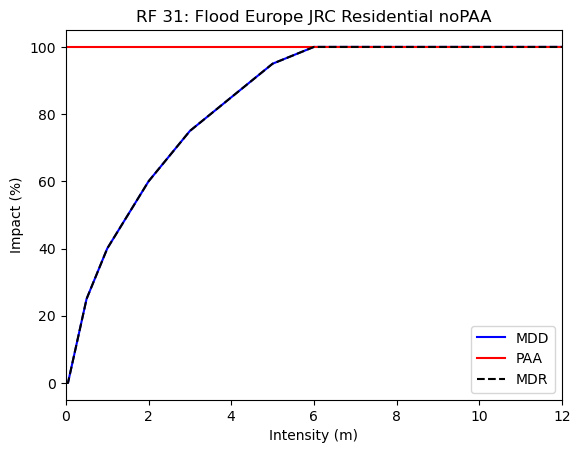

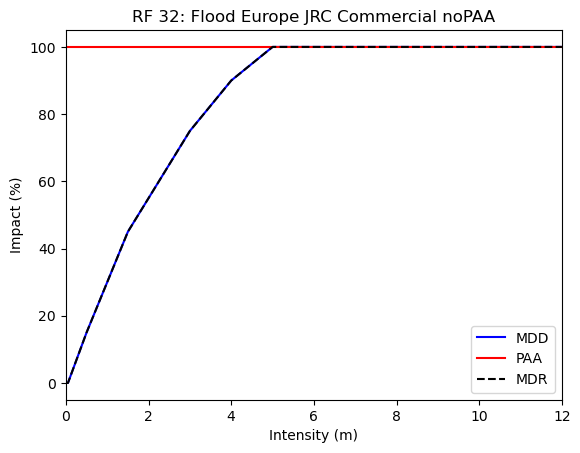

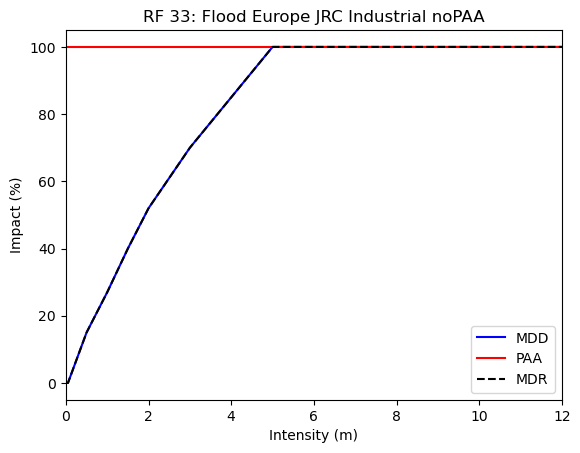

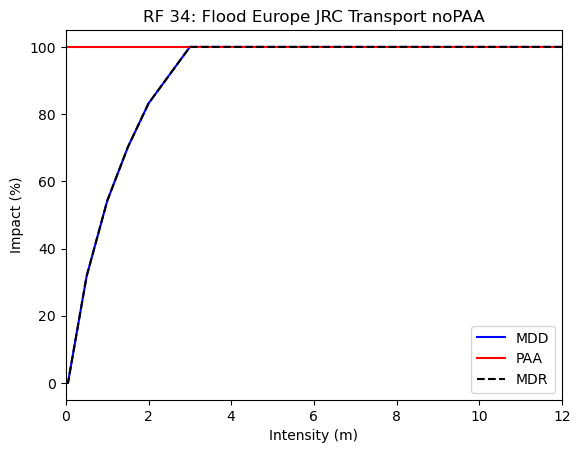

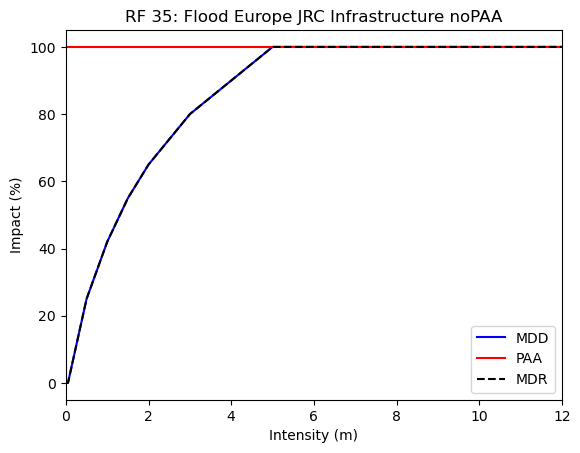

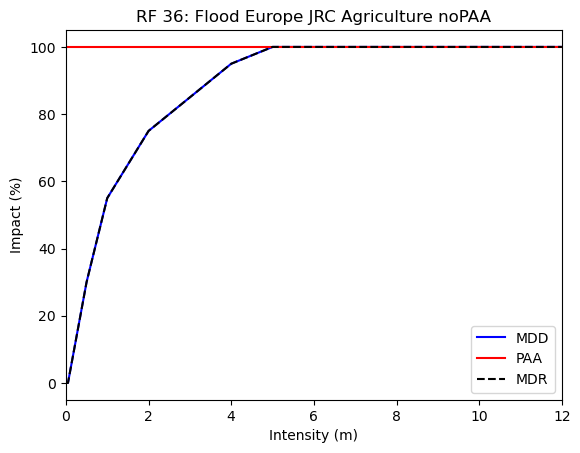

In [6]:
impf_EUR_Res = impf_set.get_func(fun_id=31)
impf_EUR_Res[0].plot()
impf_EUR_Com = impf_set.get_func(fun_id=32)
impf_EUR_Com[0].plot()
impf_EUR_Ind = impf_set.get_func(fun_id=33)
impf_EUR_Ind[0].plot()
impf_EUR_Tra = impf_set.get_func(fun_id=34)
impf_EUR_Tra[0].plot()
impf_EUR_Inf = impf_set.get_func(fun_id=35)
impf_EUR_Inf[0].plot()
impf_EUR_Cus = impf_set.get_func(fun_id=36)
impf_EUR_Cus[0].plot()

# Impact

## RCP 2.6

### Real Values

In [ ]:
imp=ImpactCalc(exp, impf_set,rf_26).impact(save_mat=True)
print(f"Aggregated average annual impact: {round(imp.aai_agg,0)} $")
imp.plot_hexbin_eai_exposure(adapt_fontsize=False, ignore_zero=False, buffer=0.05)

freq_curve = imp.calc_freq_curve()
freq_curve.plot();

### Log Scale

In [ ]:
imp=ImpactCalc(exp_log, impf_set,rf_26).impact(save_mat=True)
print(f"Aggregated average annual impact: {round(imp.aai_agg,0)} $")
imp.plot_hexbin_eai_exposure(adapt_fontsize=False, ignore_zero=False, buffer=0.05)

## RCP 6.0

### Real Values

In [ ]:
imp=ImpactCalc(exp, impf_set,rf_60).impact(save_mat=True)
print(f"Aggregated average annual impact: {round(imp.aai_agg,0)} $")
imp.plot_hexbin_eai_exposure(adapt_fontsize=False, ignore_zero=False, buffer=0.05)

freq_curve = imp.calc_freq_curve()
freq_curve.plot();

### Log Scale

In [ ]:
imp=ImpactCalc(exp_log, impf_set,rf_60).impact(save_mat=True)
print(f"Aggregated average annual impact: {round(imp.aai_agg,0)} $")
imp.plot_hexbin_eai_exposure(adapt_fontsize=False, ignore_zero=False, buffer=0.05)

## RCP 8.5

### Real Values

In [ ]:
imp=ImpactCalc(exp, impf_set,rf_85).impact(save_mat=True)
print(f"Aggregated average annual impact: {round(imp.aai_agg,0)} $")
imp.plot_hexbin_eai_exposure(adapt_fontsize=False, ignore_zero=False, buffer=0.05)

freq_curve = imp.calc_freq_curve()
freq_curve.plot();

### Log Scale

In [ ]:
imp=ImpactCalc(exp_log, impf_set,rf_85).impact(save_mat=True)
print(f"Aggregated average annual impact: {round(imp.aai_agg,0)} $")
imp.plot_hexbin_eai_exposure(adapt_fontsize=False, ignore_zero=False, buffer=0.05)

# Use Case

## Pre-processing

In [ ]:
case_poly = ox.geocode_to_gdf("Borealis Polyolefine GmbH")
case_poly

In [ ]:
case_area = gpd.read_file("ext_total_exp_no2.gpkg")

In [ ]:
case_exp = gpd.sjoin(case_area, case_poly, predicate='intersects', how='inner')

In [ ]:
case_exp.to_file('case_exp.gpkg', driver = 'GPKG')

## Initialization

In [ ]:
case_exp = gpd.read_file("case_exp.gpkg")

In [ ]:
visual = case_exp.to_crs(epsg=3857)

fig, ax = plt.subplots(figsize=(10, 10))
visual.plot(ax=ax, markersize=4, color='blue', alpha=0.7)

# Add basemap (e.g., OpenStreetMap)
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)

In [ ]:
case = Exposures(case_exp)
case.check()
case.plot_hexbin(pop_name=True);

In [ ]:
case_imp = ImpactCalc(case, impf_set,rf_26).impact(save_mat=True)
print(f"Aggregated average annual impact: {round(case_imp.aai_agg,0)} $")

case_imp.plot_basemap_eai_exposure(adapt_fontsize=False, ignore_zero=False, buffer=0.05)

freq_curve = case_imp.calc_freq_curve()
freq_curve.plot();

In [ ]:
case_imp = ImpactCalc(case, impf_set,rf_60).impact(save_mat=True)
print(f"Aggregated average annual impact: {round(case_imp.aai_agg,0)} $")

case_imp.plot_basemap_eai_exposure(adapt_fontsize=False, ignore_zero=False, buffer=0.05)

freq_curve = case_imp.calc_freq_curve()
freq_curve.plot();

In [ ]:
case_imp = ImpactCalc(case, impf_set,rf_85).impact(save_mat=True)
print(f"Aggregated average annual impact: {round(case_imp.aai_agg,0)} $")

case_imp.plot_basemap_eai_exposure(adapt_fontsize=False, ignore_zero=False, buffer=0.05)

freq_curve = case_imp.calc_freq_curve()
freq_curve.plot();